Program: 03_kmeans.R  
Date: September, 2019  
Programmer: Hillary Mulder  
Purpose: Use K means for clustering

In [1]:
library(cluster)
library(caret)
library(purrr)
library(dplyr)
library(boot)
#library(table1)
library(Hmisc)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘purrr’

The following object is masked from ‘package:caret’:

    lift


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘boot’

The following object is masked from ‘package:lattice’:

    melanoma

Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:boot’:

    aml

The following object is masked from ‘package:caret’:

    cluster

Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



In [3]:
data=read.csv("Data/analysis_ds.csv")
train=data[which(data$train==1),]
#colnames(train)
base_nmiss=train[complete.cases(train[, c(1:3, 5, 6, 9:19, 20:22, 50, 51)]), c(1:3, 5, 6, 9:19, 20:22, 50, 51)]
studyn=base_nmiss$study.1
enrolid=base_nmiss[,1]
base_nmiss=base_nmiss[, -c(1,7,8,20,21)]
#base_nmiss=base_nmiss[, -c(1,9,10,22,23)]
ppr=preProcess(base_nmiss, method=c('center','scale'))

#apply transformations
base_scale=predict(ppr, newdata=base_nmiss)

#base_scale=scale(base_nmiss)

In [4]:
test=data[which(data$test==1),]
test_nmiss=test[complete.cases(test[, c(1:3, 5, 6, 9:19, 20:22, 50, 51)]), c(1:3, 5, 6, 9:19, 20:22, 50, 51)]
test_studyn=test_nmiss$study.1
test_enrolid=test_nmiss[,1]
test_nmiss=test_nmiss[, -c(1,7,8,20,21)]
#base_nmiss=base_nmiss[, -c(1,9,10,22,23)]
#test_scale=scale(_nmiss)
test_scale=predict(ppr, newdata=test_nmiss)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1233550)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1233550)”

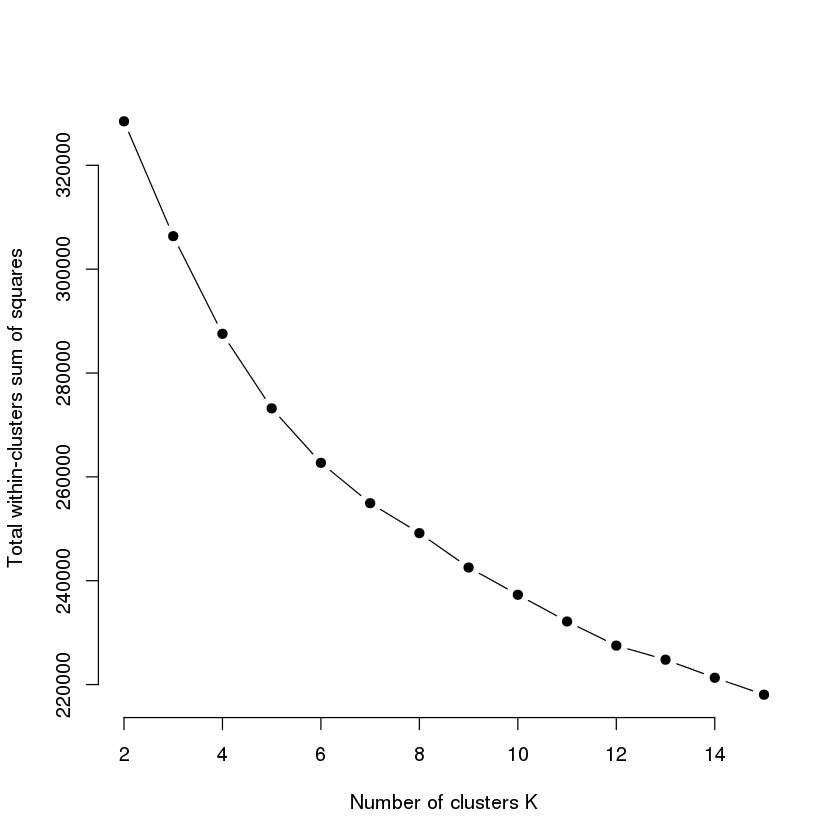

In [5]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(base_scale, k, iter.max=20, nstart = 4)$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 2:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")


In [6]:
#going to use 4 or 5 clusters

set.seed(123)
cluster1 <- kmeans(base_scale, 4, iter.max=15, nstart = 6)
cluster2 <- kmeans(base_scale, 5, iter.max=15, nstart = 6)

In [7]:
base_nmiss %>%
  mutate(Cluster = cluster1$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

base_nmiss %>%
  mutate(Cluster = cluster2$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

Cluster,age,Sex,Race2,BMI,Toba,HxMIStr,revasc,BP.s,BP.d,LDL,HDL,TChol,Trig,HMG,asprin,antihyp
1,65.31565,1.554614,1.994874,30.63139,0.6453076,0.1886830,0.05205047,145.0047,83.41719,136.15122,52.02031,212.9440,124.0130,0.1585174,0.3055994,1.0000000
2,64.22291,1.407424,1.234189,29.88754,0.4903758,0.1567369,0.08890926,149.4060,85.20348,129.76352,45.60587,208.0394,169.2768,0.2172319,0.3551787,0.0000000
3,63.77655,1.215001,1.094279,31.84018,0.2257506,0.4497714,0.54553318,130.4217,72.68775,82.09823,36.93636,153.8745,182.1022,0.8995428,0.8153960,0.9935747
4,66.34801,1.453775,1.000429,29.82910,0.6891892,0.2148220,0.12998713,145.1526,82.52520,134.32797,44.61583,213.9825,176.9846,0.1025311,0.4192407,1.0000000


Cluster,age,Sex,Race2,BMI,Toba,HxMIStr,revasc,BP.s,BP.d,LDL,HDL,TChol,Trig,HMG,asprin,antihyp
1,63.25405,1.315497,1.156885,32.33039,0.2228615,0.2084772,0.0001917913,132.0401,73.28845,90.20081,39.28251,163.8345,179.2213,0.74817798,0.6609129,0.9948216
2,64.05902,1.170098,1.065655,31.44811,0.2576381,0.6084507,0.9997833153,130.7757,73.43077,82.43055,35.89772,153.7597,184.5941,0.88060672,0.8829902,0.9882990
3,64.27408,1.411519,1.236879,29.86599,0.4941941,0.1542034,0.0831398049,149.6558,85.33535,130.39155,45.72736,208.8616,168.9340,0.20668834,0.3483511,0.0000000
4,65.48788,1.563255,1.994067,30.47099,0.6785336,0.1938970,0.0521296885,145.7730,84.04556,138.77156,52.65099,216.1227,123.6675,0.11888112,0.2860776,1.0000000
5,66.91711,1.464115,1.000251,29.43393,0.7501882,0.2258469,0.1311166876,146.5841,83.48632,138.55433,45.28043,218.4538,174.2345,0.06813049,0.4030113,1.0000000


In [8]:
#table(base_nmiss$studyn, final$cluster)
check=data.frame(person_id=enrolid, study=studyn, cluster1=cluster1$cluster, cluster2=cluster2$cluster)
#head(check)
table(check$study, check$cluster1)
table(check$study, check$cluster2)

         
             1    2    3    4
  ACCORD   901  874 3700 1795
  AIMHIGH    9   53 3026   14
  ALLHAT  3983 1230  406 7300
  BARI2D   179   25  961  215

         
             1    2    3    4    5
  ACCORD  3373 1331  854  683 1029
  AIMHIGH  477 2568   44    6    7
  ALLHAT   544  422 1230 3908 6815
  BARI2D   820  294   25  122  119

In [9]:
#table(base_nmiss$studyn, final$cluster)
predict.kmeans <- function(object,
                           newdata,
                           method = c("centers", "classes")) {
  method <- match.arg(method)

  centers <- object$centers
  ss_by_center <- apply(centers, 1, function(x) {
    colSums((t(newdata) - x) ^ 2)
  })
  best_clusters <- apply(ss_by_center, 1, which.min)

  if (method == "centers") {
    centers[best_clusters, ]
  } else {
    best_clusters
  }
}

pred1=predict.kmeans(cluster1, newdata=test_scale, method="classes")
pred2=predict.kmeans(cluster2, newdata=test_scale, method="classes")
std=data.frame(person_id=test_enrolid, study=test_studyn, cluster1=pred1, cluster2=pred2)
#head(std)
table(std$study, std$cluster1)
table(std$study, std$cluster2)

         
             1    2    3    4
  ACCORD   260  285 1312  574
  AIMHIGH    3   16 1011    6
  ALLHAT  1331  439  142 2397
  BARI2D    69   11  316   63

         
             1    2    3    4    5
  ACCORD  1150  478  281  184  338
  AIMHIGH  159  864   11    0    2
  ALLHAT   179  147  439 1310 2234
  BARI2D   250  102   11   51   45

In [10]:
#train2=left_join(x=train, y=check, by='person_id')
#colnames(train)
#head(train)
#test2=left_join(x=test, y=std, by='person_id')

#all=rbind(train2, test2)
#head(all)
#write.csv(all, file='Data/analysis_ds_clusters.csv', quote = FALSE,  row.names = FALSE)